In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys, html, nltk, collections, math, time
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
from nltk.util import ngrams
from langdetect import detect

def getTrainingData():
    
    training_path = os.path.join(sys.path[0], "assignment-comp3222-comp6246-mediaeval2015-dataset\\mediaeval-2015-trainingset.txt")
    training_data = np.genfromtxt(fname = training_path, dtype = str, encoding = 'utf8', delimiter = '\t', comments = None, skip_header = 1)
    
    return training_data
        
def getTestData():
    test_path = os.path.join(sys.path[0], "assignment-comp3222-comp6246-mediaeval2015-dataset\\mediaeval-2015-testset.txt")
    test_data = np.genfromtxt(fname = test_path, dtype = str, encoding = 'utf8', delimiter = '\t', comments = None, skip_header = 1)
    return test_data 
    

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thwal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
print(getTrainingData().shape)

(14482, 7)


In [4]:
def processData(data):

    processed_data = np.empty([0,2])
    tknzr = TweetTokenizer()
    complete_ngram_list = []

    batches = int(len(data) / 50)
    #batches = 1

    for batchIndex in range(batches):

        print("Batch: ",batchIndex+1, "/",batches)
        start = batchIndex*50
        end = (batchIndex+1)*50 - 1

        batch = data[start:end]

        for x in batch:
            
            text = x[1]
            
            try:
                language = detect(text)
            except:
                #in case that language can't be determined assume not english
                language = 'false'


            #checks if language is english keep, if not english then remove (translator apis have a limit thus can't translate all foreign entries).
            if 'en' in language:
                langProcessedText = text
                tokens = tknzr.tokenize(langProcessedText)

                list_words_and_pos = nltk.tag.pos_tag(tokens)
                list_pos = [pos for word,pos in list_words_and_pos]

                ngram = ngrams(list_pos, 3)
                ngram_list = list(ngram)
                ngram_collection = collections.Counter(ngram_list)


                #get the label to pair with the text
                label = x[6]

                #converting humor labels to fake.
                if 'humor' in label:
                    label = 'fake'

                complete_ngram_list = complete_ngram_list + ngram_list

                processed_data = np.vstack((processed_data, [list(ngram_collection.items()),label]))

        time.sleep(0.1)


    complete_ngram_collection = collections.Counter(complete_ngram_list)
    
    return (processed_data,complete_ngram_collection)

In [5]:
def processData_v2(data):

    processed_data = np.empty([0,2])
    tknzr = TweetTokenizer()
    complete_unigram_list = []
    complete_bigram_list = []
    complete_trigram_list = []

    batches = int(len(data) / 50)
    #batches = 1

    for batchIndex in range(batches):

        print("Batch: ",batchIndex+1, "/",batches)
        start = batchIndex*50
        end = (batchIndex+1)*50 - 1

        batch = data[start:end]

        for x in batch:
            
            text = x[1]
            
            try:
                language = detect(text)
            except:
                #in case that language can't be determined assume not english
                language = 'false'


            #checks if language is english keep, if not english then remove (translator apis have a limit thus can't translate all foreign entries).
            if 'en' in language:
                langProcessedText = text
                tokens = tknzr.tokenize(langProcessedText)

                list_words_and_pos = nltk.tag.pos_tag(tokens)
                list_pos = [pos for word,pos in list_words_and_pos]

                unigrams = ngrams(list_pos, 1)
                bigrams = ngrams(list_pos, 2)
                trigrams = ngrams(list_pos, 3)
                unigram_list = list(unigrams)
                bigram_list = list(bigrams)
                trigram_list = list(trigrams)
                ngram_list = unigram_list + bigram_list + trigram_list
                ngram_collection = collections.Counter(ngram_list)


                #get the label to pair with the text
                label = x[6]

                #converting humor labels to fake.
                if 'humor' in label:
                    label = 'fake'

                complete_unigram_list = complete_unigram_list + unigram_list
                complete_bigram_list = complete_bigram_list + bigram_list
                complete_trigram_list = complete_trigram_list + trigram_list

                processed_data = np.vstack((processed_data, [list(ngram_collection.items()),label]))

        time.sleep(0.1)


    complete_unigram_collection = collections.Counter(complete_unigram_list)
    complete_bigram_collection = collections.Counter(complete_bigram_list)
    complete_trigram_collection = collections.Counter(complete_trigram_list)
    
    return (processed_data, complete_unigram_collection, complete_bigram_collection, complete_trigram_collection)

In [6]:
import matplotlib.pyplot as plt

#color_map = ["yo", "bs", "g^"]
def printFeatureGraph(feature, Array):
    real_data_list = []
    real_data = []
    fake_data_list = []
    fake_data = []
    #print(Array)
    
    
    for trigrams, label in Array:
        
        feature_repetitions = 0
        for trigram, freq in trigrams:
            if (feature == trigram):
                feature_repetitions = freq
                
        if label in 'real':
            real_data_list.append(feature_repetitions)
        else:
            fake_data_list.append(feature_repetitions)
                
        #real_data = np.vstack((real_data, [feature_repetitions,numerical_label]))
    
    #print(real_data, fake_data)
    real_data_collection = list(collections.Counter(real_data_list).items())
    for docFreq, dataFreq in real_data_collection:
        percFreq = dataFreq*100/len(real_data_list)
        real_data.append((docFreq, percFreq))
    
    fake_data_collection = list(collections.Counter(fake_data_list).items())
    for docFreq, dataFreq in fake_data_collection:
        percFreq = dataFreq*100/len(fake_data_list)
        fake_data.append((docFreq, percFreq))
    
    
    #print(real_data_collection, fake_data_collection)
    
    
    #print(list(numerical_formated_data[:, 0]))
    plt.plot([i[0] for i in real_data], [i[1] for i in real_data],'yo', 
             label='real')
    plt.plot([i[0] for i in fake_data], [i[1] for i in fake_data],'bs', 
             label='fake')
        
    plt.xlabel("Frequency in Document")
    plt.ylabel("percentage frequency in Data")
    plt.show()

In [7]:
def allFeatureGraphs(array, complete_ngram_collection, numberOfFeatures):
    x = complete_ngram_collection.most_common(numberOfFeatures)
    top_features = [i[0] for i in x]

    for f in top_features:
        print(f)
        printFeatureGraph(f, array)
    #printFeatureGraph(top_features[0], processed_data)

In [8]:

def featurePreperation(listOfFeatures, array):
    feature_data = np.empty([0,len(listOfFeatures)])
    
    for ngrams, label in array:
        entry_data = []
        
        for feature in listOfFeatures:
            
            feature_repetitions = 0
            for ngram, freq in ngrams:
                if (feature == ngram):
                    feature_repetitions = freq
            
            entry_data.append(feature_repetitions)
            
        #entry_data.append(label)
            
        feature_data = np.vstack((feature_data, entry_data))
            
    return feature_data
    

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

def fitLinearSVM(features, data, c_var):
    X = featurePreperation(features, data)
    y = data[:,1]

    svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("linear_svc", LinearSVC(C=c_var, loss="hinge", max_iter = 1000000)),
        ))

    svm_clf.fit(X, y)
    
    return svm_clf

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def fitPolySVM(features, data, c_var,degree_var):
    X = featurePreperation(features, data)
    y = data[:,1]

    polynomial_svm_clf = Pipeline((
            ("poly_features", PolynomialFeatures(degree=degree_var)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C=c_var, loss="hinge", max_iter = 1000000)),
        ))

    polynomial_svm_clf.fit(X, y)
    
    return polynomial_svm_clf

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def fitLinearKernelSVM(features, data, c_var, weight):
    X = featurePreperation(features, data)
    y = list(data[:,1])

    linear_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="linear", class_weight={'real':weight,'fake':1}))
        ))

    linear_svm_clf.fit(X, y)
    
    return linear_svm_clf

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def fitPolyKernelSVM(features, data, degree_var, r, c_var, weight):
    X = featurePreperation(features, data)
    y = list(data[:,1])

    polynomial_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=degree_var, coef0=r, C=c_var, class_weight={'real':weight,'fake':1}))
        ))

    polynomial_svm_clf.fit(X, y)
    
    return polynomial_svm_clf

In [21]:
def testResults(svm, features, processed_test_data):
    
    X = featurePreperation(features, processed_test_data)
    pred_y = svm.predict(X)
    actu_y = processed_test_data[:,1]
                       
    #print(processed_test_data)
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    
    for i in range(len(pred_y)):
        
        
        if(pred_y[i]==actu_y[i]):
            if(pred_y[i]=='fake'):
                TP = TP + 1
            else:
                TN = TN + 1    
        else:
            if(pred_y[i]=='fake'):
                FP = FP + 1
            else:
                FN = FN + 1
    
    print("TP: ",TP,"TN: ", TN,"FP: ", FP,"FN: ", FN)
    if(TP != 0):
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        fake_precision = TP/(TP+FP)
        fake_recall = TP/(TP+FN)
        fake_f1_score = 2*(fake_recall * fake_precision)/(fake_recall + fake_precision)
        
        print("Accuracy: ", accuracy,"\nfake:", "\nprecision: ", fake_precision, 
              "\nrecall: ", fake_recall, "\nf1_score: ", fake_f1_score,)
        
        if(TN != 0):
            real_precision = TN/(TN+FN)
            real_recall = TN/(TN+FP)
            real_f1_score = 2*(real_recall * real_precision)/(real_recall + real_precision)

            print("\nreal:", "\nprecision: ", real_precision, 
                  "\nrecall: ", real_recall, "\nf1_score: ", real_f1_score,)
        
        else:
            print("TN is 0")
        
    else:
        print("TP is 0")

In [14]:
#ITERATION 1.1
training_data = getTrainingData()
test_data = getTestData()
features = [('NNP', 'NNP', 'NNP'),
            ('NNP', 'NNP', 'NN'),
            ('NN', 'IN', 'NNP'),
            ('NNP', 'NN', 'NN'),
            ('JJ', 'NN', 'NN'),
            ('NNP', 'NN', ':'),
            ('.','JJ','NN')]

processed_training_data, training_ngrams = processData(training_data)
processed_test_data, test_ngrams = processData(test_data)

svm = fitLinearSVM(features, processed_training_data, 1)
testResults(svm, features, processed_test_data)

Batch:  1 / 289
Batch:  2 / 289
Batch:  3 / 289
Batch:  4 / 289
Batch:  5 / 289
Batch:  6 / 289
Batch:  7 / 289
Batch:  8 / 289
Batch:  9 / 289
Batch:  10 / 289
Batch:  11 / 289
Batch:  12 / 289
Batch:  13 / 289
Batch:  14 / 289
Batch:  15 / 289
Batch:  16 / 289
Batch:  17 / 289
Batch:  18 / 289
Batch:  19 / 289
Batch:  20 / 289
Batch:  21 / 289
Batch:  22 / 289
Batch:  23 / 289
Batch:  24 / 289
Batch:  25 / 289
Batch:  26 / 289
Batch:  27 / 289
Batch:  28 / 289
Batch:  29 / 289
Batch:  30 / 289
Batch:  31 / 289
Batch:  32 / 289
Batch:  33 / 289
Batch:  34 / 289
Batch:  35 / 289
Batch:  36 / 289
Batch:  37 / 289
Batch:  38 / 289
Batch:  39 / 289
Batch:  40 / 289
Batch:  41 / 289
Batch:  42 / 289
Batch:  43 / 289
Batch:  44 / 289
Batch:  45 / 289
Batch:  46 / 289
Batch:  47 / 289
Batch:  48 / 289
Batch:  49 / 289
Batch:  50 / 289
Batch:  51 / 289
Batch:  52 / 289
Batch:  53 / 289
Batch:  54 / 289
Batch:  55 / 289
Batch:  56 / 289
Batch:  57 / 289
Batch:  58 / 289
Batch:  59 / 289
Batch:

In [15]:
#ITERATION 1.2
svm = fitLinearSVM(features, processed_training_data,100)
testResults(svm, features, processed_test_data)

TP:  1609 TN:  11 FP:  1114 FN:  11
Accuracy:  0.5901639344262295 
       fake     real 
precision:  0.5908923980903416 0.5 
recall:  0.9932098765432099 0.009777777777777778 
f1_score:  0.7409624683398572 0.019180470793374017


In [16]:
#ITERATION 1.3
svm = fitPolySVM(features, processed_training_data,1,2)
testResults(svm, features, processed_test_data)

TP:  1481 TN:  33 FP:  1092 FN:  139
Accuracy:  0.5515482695810565 
       fake     real 
precision:  0.5755926933540614 0.19186046511627908 
recall:  0.9141975308641975 0.029333333333333333 
f1_score:  0.7064154543286429 0.05088666152659985


In [17]:
#ITERATION 2
training_data = getTrainingData()
test_data = getTestData()
features = [('NNP', 'NNP'), 
            ('NNP','NN'), 
            ('NN','NN'), 
            ('JJ','NN'),
            ('NN','IN'),
            ('NNP'),
            ('NN'),
            ('JJ'),
            ('IN'),
            ('.')]

processed_training_data, train_uni, train_bi, train_tri = processData_v2(training_data)
processed_test_data, test_uni, test_bi, test_tri = processData_v2(test_data)

svm = fitPolySVM(features, processed_training_data, 1,2)
testResults(svm, features, processed_test_data)

Batch:  1 / 289
Batch:  2 / 289
Batch:  3 / 289
Batch:  4 / 289
Batch:  5 / 289
Batch:  6 / 289
Batch:  7 / 289
Batch:  8 / 289
Batch:  9 / 289
Batch:  10 / 289
Batch:  11 / 289
Batch:  12 / 289
Batch:  13 / 289
Batch:  14 / 289
Batch:  15 / 289
Batch:  16 / 289
Batch:  17 / 289
Batch:  18 / 289
Batch:  19 / 289
Batch:  20 / 289
Batch:  21 / 289
Batch:  22 / 289
Batch:  23 / 289
Batch:  24 / 289
Batch:  25 / 289
Batch:  26 / 289
Batch:  27 / 289
Batch:  28 / 289
Batch:  29 / 289
Batch:  30 / 289
Batch:  31 / 289
Batch:  32 / 289
Batch:  33 / 289
Batch:  34 / 289
Batch:  35 / 289
Batch:  36 / 289
Batch:  37 / 289
Batch:  38 / 289
Batch:  39 / 289
Batch:  40 / 289
Batch:  41 / 289
Batch:  42 / 289
Batch:  43 / 289
Batch:  44 / 289
Batch:  45 / 289
Batch:  46 / 289
Batch:  47 / 289
Batch:  48 / 289
Batch:  49 / 289
Batch:  50 / 289
Batch:  51 / 289
Batch:  52 / 289
Batch:  53 / 289
Batch:  54 / 289
Batch:  55 / 289
Batch:  56 / 289
Batch:  57 / 289
Batch:  58 / 289
Batch:  59 / 289
Batch:

In [29]:
#ITERATION 3
svm = fitPolyKernelSVM(features, processed_training_data, 2,5,10,1.4)
testResults(svm, features, processed_test_data)

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


TP:  1398 TN:  95 FP:  1032 FN:  207
Accuracy:  0.5464860907759883 
fake: 
precision:  0.5753086419753086 
recall:  0.8710280373831776 
f1_score:  0.6929368029739778

real: 
precision:  0.31456953642384106 
recall:  0.08429458740017746 
f1_score:  0.13296011196641008


In [24]:
#ITERATION 4
features = [('NNP','NN'),  
            ('JJ','NN'),
            ('NN'),
            ('JJ'),
            ('IN'),]

svm2 = fitPolyKernelSVM(features, processed_training_data, 3,5,10,1.5)
testResults(svm2, features, processed_test_data)

TP:  1605 TN:  0 FP:  1127 FN:  0
Accuracy:  0.5874816983894583 
fake: 
precision:  0.5874816983894583 
recall:  1.0 
f1_score:  0.7401429559603413
TN is 0


C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


TP:  1199 TN:  437 FP:  690 FN:  406
Accuracy:  0.5988286969253295 
fake: 
precision:  0.6347273689782954 
recall:  0.7470404984423676 
f1_score:  0.6863194046937607

real: 
precision:  0.5183867141162515 
recall:  0.3877551020408163 
f1_score:  0.4436548223350254


In [ ]:
#FEATURE PRINING
#ITERATION 1
print("Top 100 Trigrams")
allFeatureGraphs(processed_training_data, train_tri, 100)

Unigrams:
('NNP',)


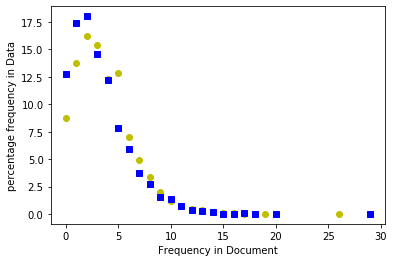

('NN',)


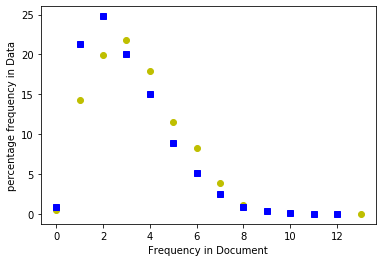

('JJ',)


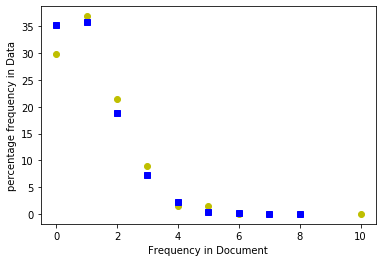

('IN',)


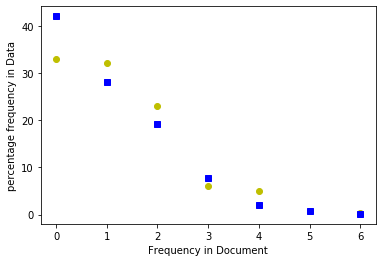

('.',)


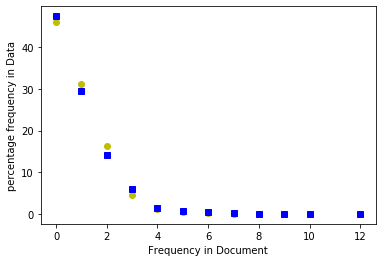

('DT',)


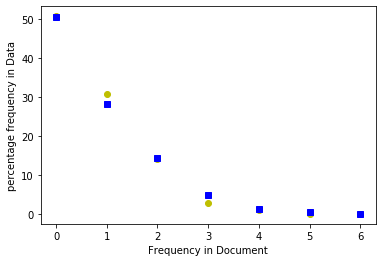

('NNS',)


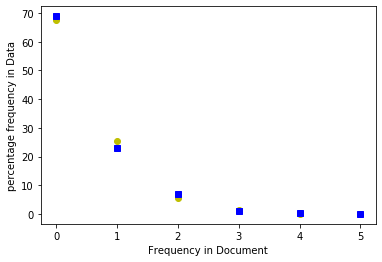

(':',)


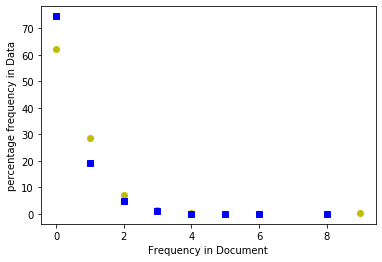

('RB',)


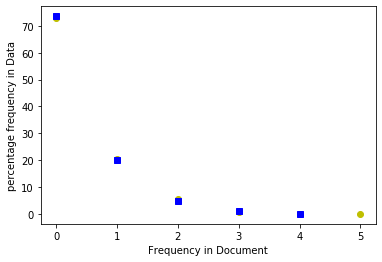

('VBZ',)


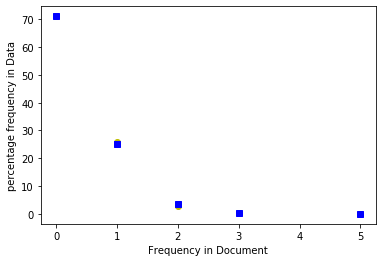

('VBG',)


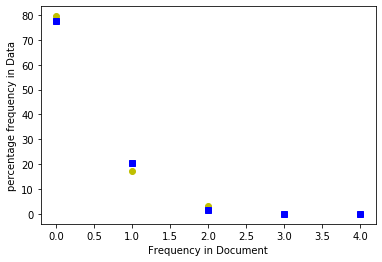

('VB',)


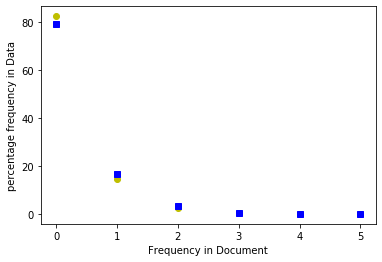

('VBP',)


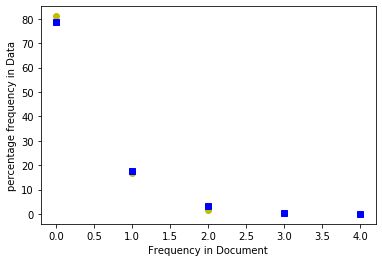

('VBD',)


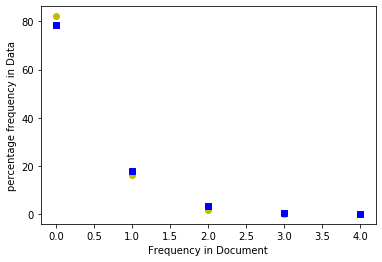

('PRP',)


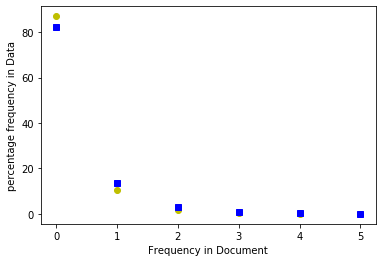

(',',)


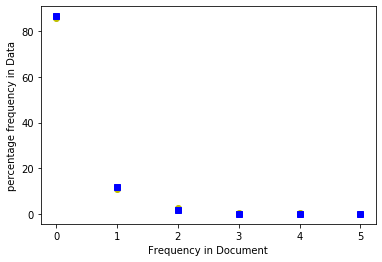

('VBN',)


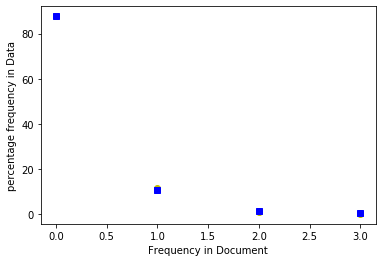

('CD',)


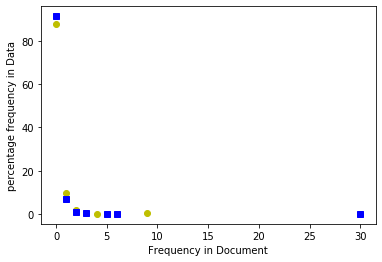

('CC',)


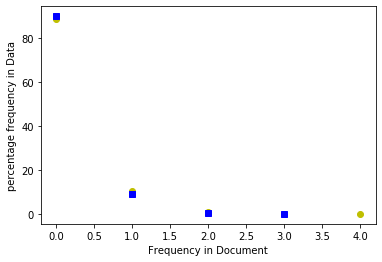

('TO',)


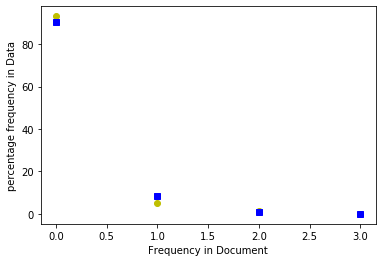

Bigrams:
('NNP', 'NNP')


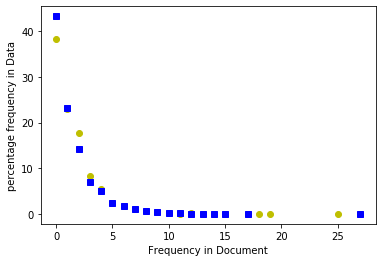

('NNP', 'NN')


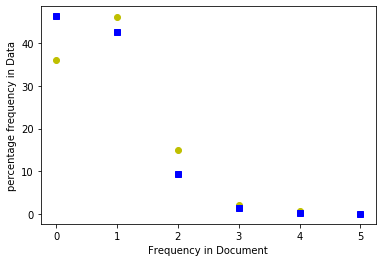

('NN', 'NN')


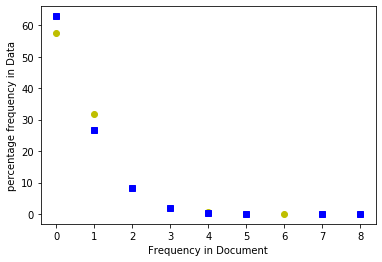

('JJ', 'NN')


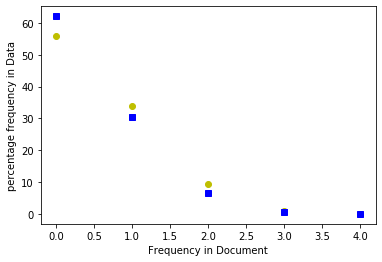

('NN', 'IN')


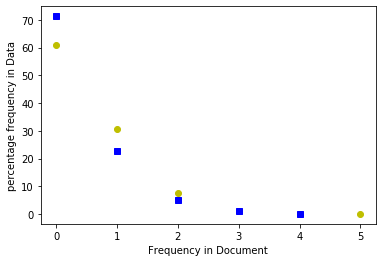

('IN', 'NNP')


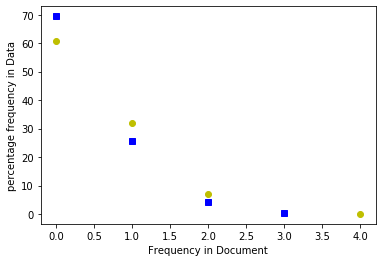

('DT', 'NN')


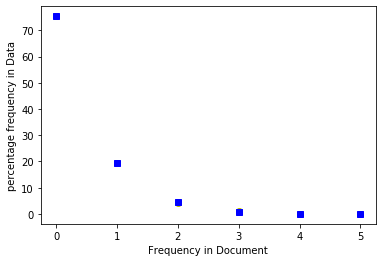

('NN', 'NNP')


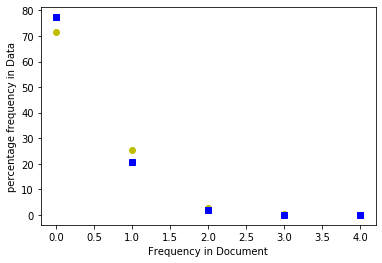

('IN', 'DT')


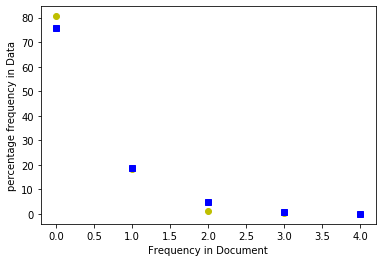

('JJ', 'NNP')


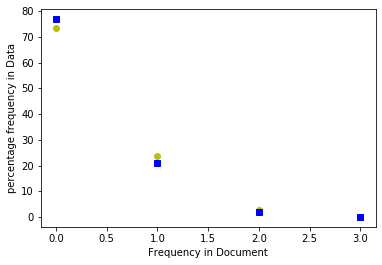

('NN', '.')


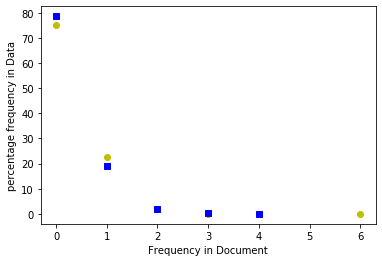

('NNP', '.')


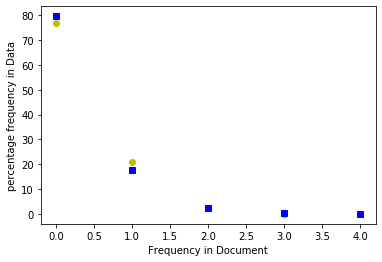

('.', 'NN')


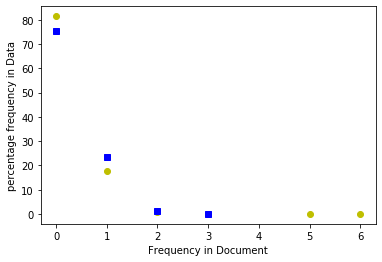

('NN', ':')


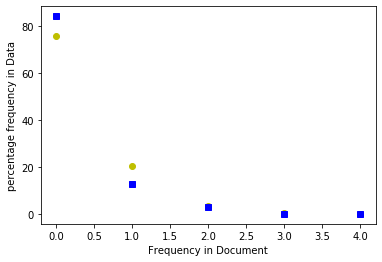

('NNP', 'IN')


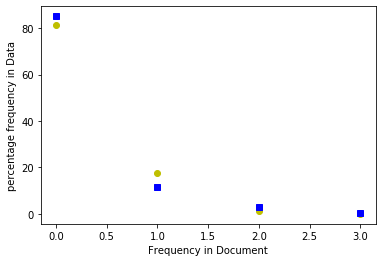

('IN', 'NN')


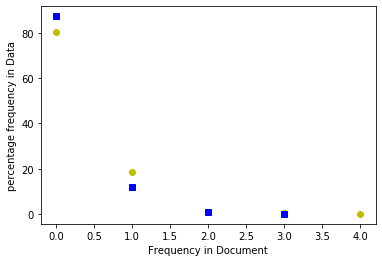

('DT', 'NNP')


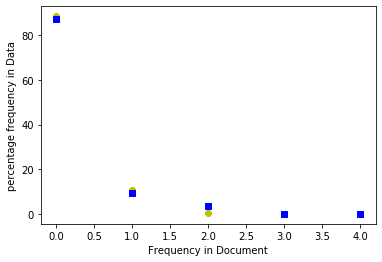

('.', 'JJ')


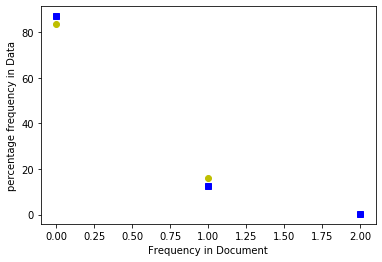

('.', 'NNP')


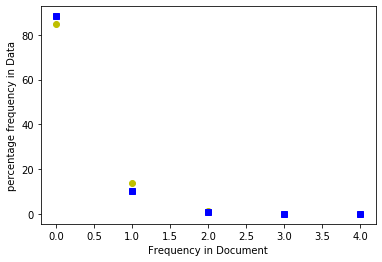

('.', '.')


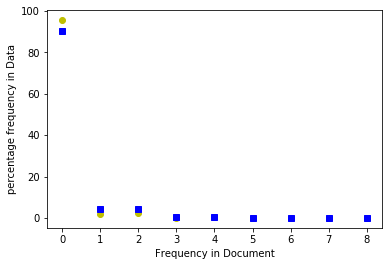

Trigrams:
('NNP', 'NNP', 'NNP')


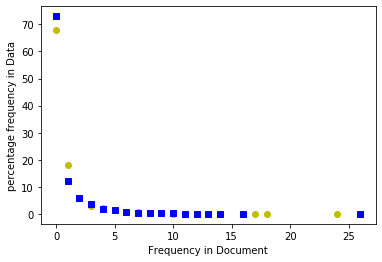

('NNP', 'NNP', 'NN')


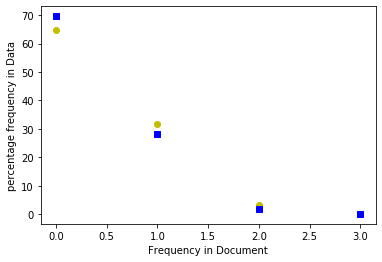

('IN', 'NNP', 'NNP')


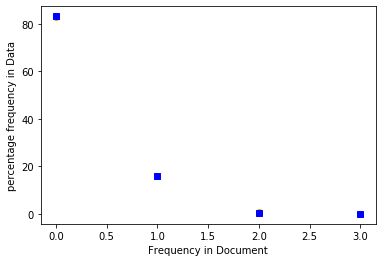

('NN', 'IN', 'NNP')


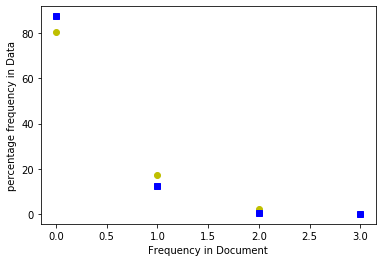

('JJ', 'NNP', 'NNP')


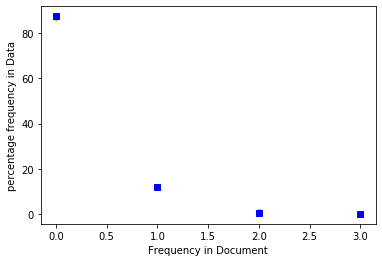

('NN', 'NNP', 'NNP')


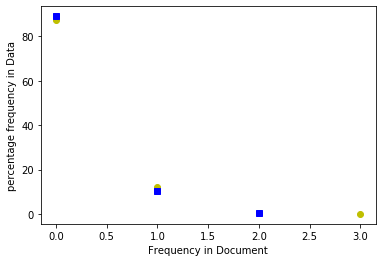

('NNP', 'NN', 'NN')


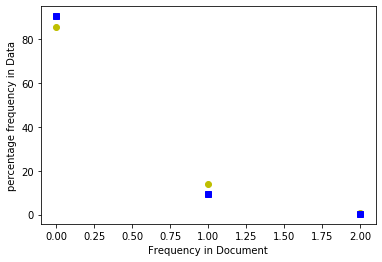

('NN', 'IN', 'DT')


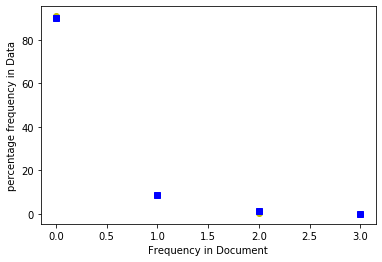

('DT', 'NN', 'IN')


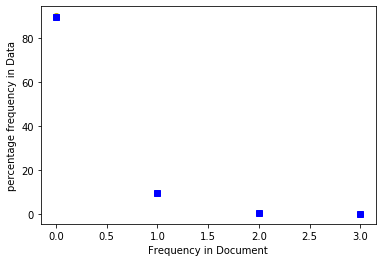

('IN', 'DT', 'NN')


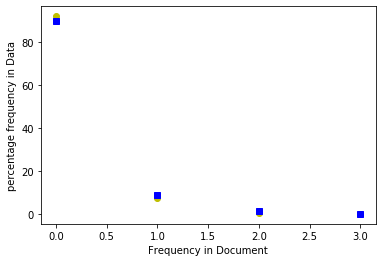

('NNP', 'NNP', '.')


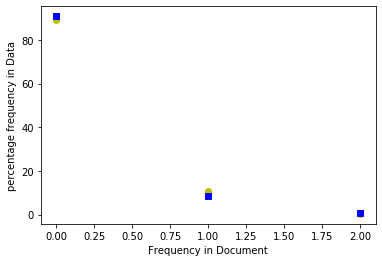

('JJ', 'NN', 'NN')


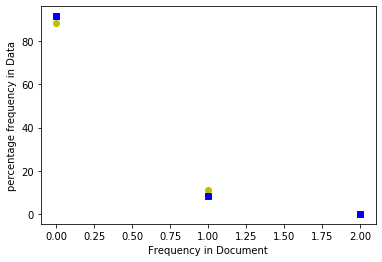

('NNP', 'NN', ':')


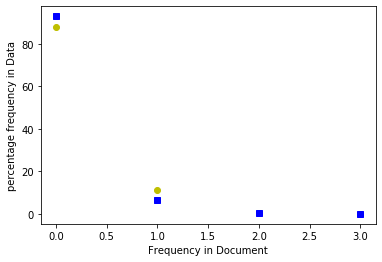

('NNP', 'IN', 'NNP')


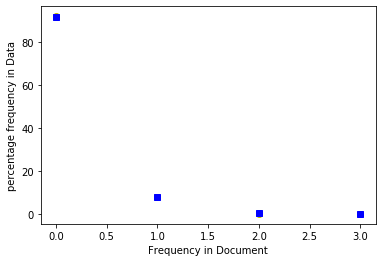

('JJ', 'NNP', 'NN')


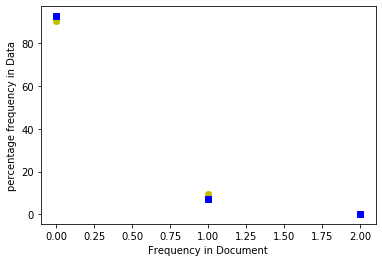

('.', 'JJ', 'NN')


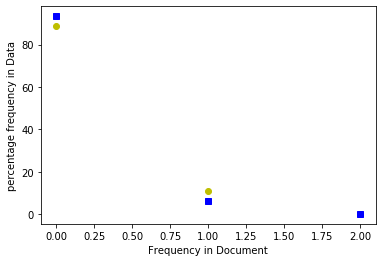

('NNP', '.', 'NN')


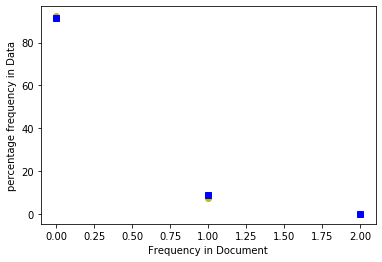

('IN', 'DT', 'NNP')


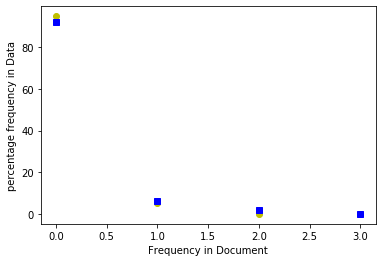

('DT', 'JJ', 'NN')


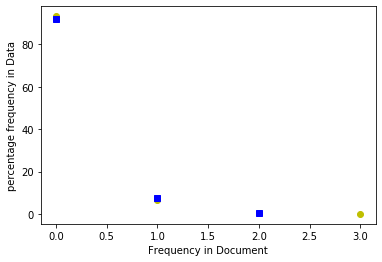

('NN', 'NNP', 'NN')


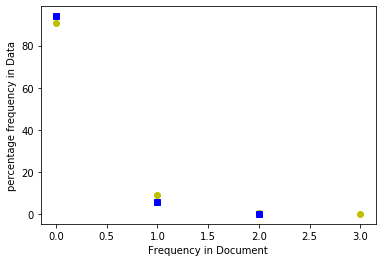

In [18]:
#ITERATION 2
print("Unigrams:")
allFeatureGraphs(processed_training_data, train_uni, 20)

print("Bigrams:")
allFeatureGraphs(processed_training_data, train_bi, 20)

print("Trigrams:")
allFeatureGraphs(processed_training_data, train_tri, 20)